In [1]:
from PlottingTools.Plotter import Plotter, DrawDataVsMC, DivideHistograms
import ROOT

Welcome to JupyROOT 6.10/09

Applying ATLAS style settings...



In [2]:
from inputs.samples import INPUT

In [3]:
plots = Plotter(INPUT, "EoverP_ClusterEnergyInDetTrackParticlesLoose_tree", base_selections = "(abs(trk_z0sintheta) < 1.5) && (abs(trk_d0) < 1.5)")

In [4]:
DataTracks = plots.GetNumberOfTracks("MinBiasData")
MCTracks = plots.GetNumberOfTracks("PythiaJetJet")
print("This is the normalization of MC to Data", DataTracks/MCTracks)
plots.SetTotalTrackNumberNormalization("PythiaJetJet", DataTracks/MCTracks)

no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
('This is the normalization of MC to Data', 0.015534065886436845)


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [5]:
#import thje variables that we want to plot
from variables.variables import \
calc_trkNearestNeighbourEM2, \
calc_trkP, \
calc_EOP, \
calc_trkPt, \
calc_trkAverageMu, \
calc_trkEtaID, \
calc_trkEtaECAL

#import the selections that we want to plot
from selections.selections import \
sel_NTRT20, \
sel_NTRT25, \
sel_NTRT30, \
sel_ECALEta0_6, \
sel_PGreater1 ,\
sel_PGreater1_5, \
sel_PGreater2, \
sel_PGreater2_5, \
sel_Z0SinThetaLess1_5, \
sel_d0Less1_5

#impot the ID selections that we want to plot
from selections.selections import \
sel_IDEta0_6,\
sel_IDEta06_11,\
sel_IDEta11_14,\
sel_IDEta14_15, \
sel_IDEta15_18, \
sel_IDEta18_23

Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
         412 function calls in 17.500 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.004    0.004   17.500   17.500 <string>:1(<module>)
        4  

Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkAverageMu0 (Potential memory leak).


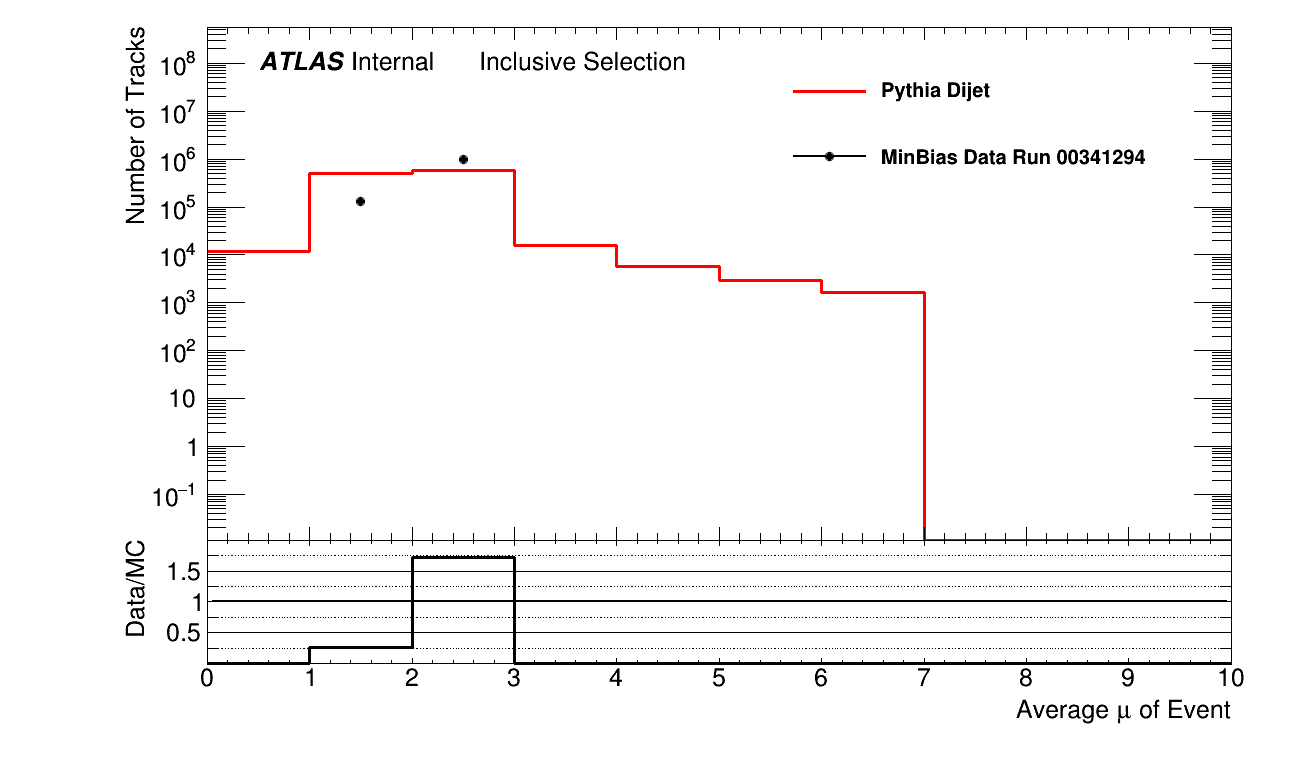

In [6]:
selections = []
import cProfile
cProfile.run("trkAverageMuHist = plots.GetHistograms(calc_trkAverageMu,\
                                       list_selections = selections,\
                                       bins = 10,\
                                       range_low = 0.0, \
                                       range_high = 10.0,\
                                       xlabel ='Average #mu of Event',\
                                       ylabel = 'Number of Tracks')")
description = "Inclusive Selection"
DataVsMC = DrawDataVsMC(trkAverageMuHist,\
                        plots.channelLabels,\
                        MCKey='PythiaJetJet',\
                        DataKey='MinBiasData',\
                        extra_description = description)
DataVsMC.Draw()

Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist


Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkPt1 (Potential memory leak).


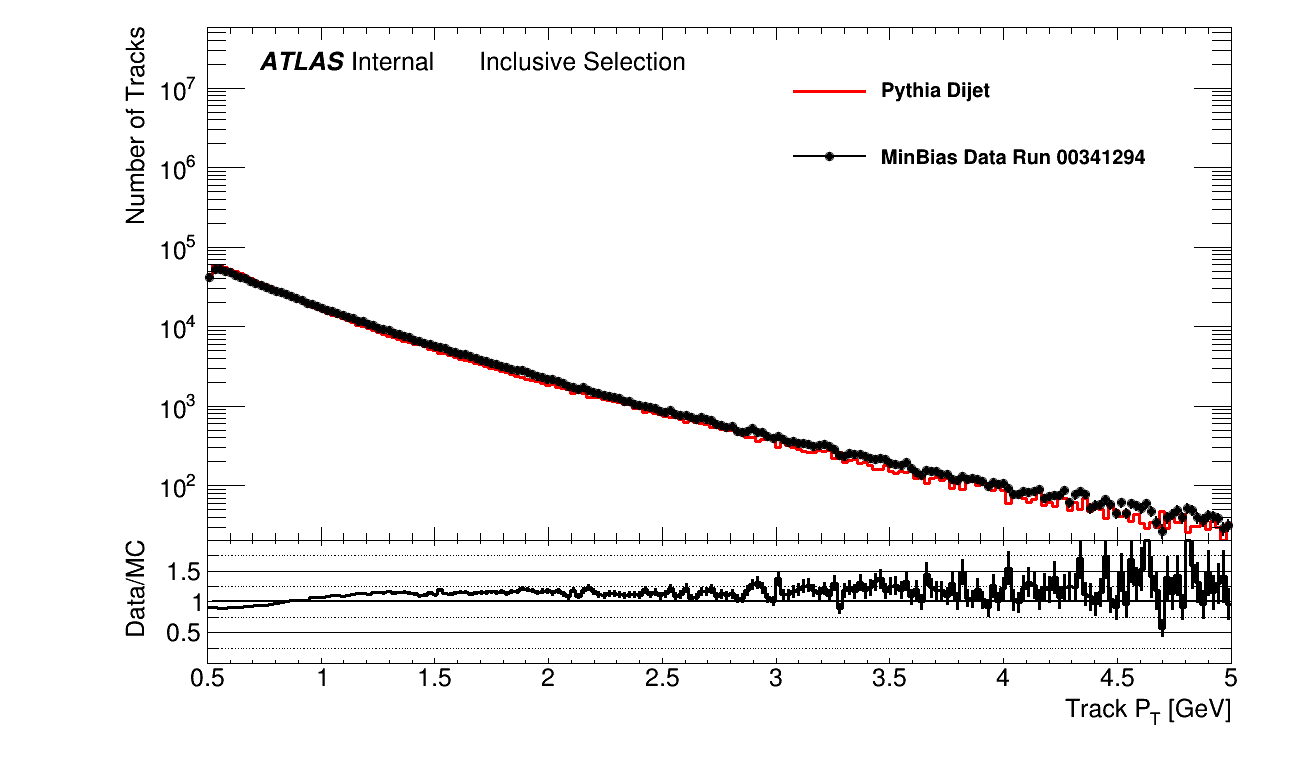

In [7]:
trkPtHistZoom = plots.GetHistograms(calc_trkPt, \
                                    list_selections = [], \
                                    bins = 200, \
                                    range_low = 0.5, \
                                    range_high = 5, \
                                    xlabel ="Track P_{T} [GeV]",\
                                    ylabel = "Number of Tracks")
description = "Inclusive Selection"
trkPtHistZoomCanvas = DrawDataVsMC(trkPtHistZoom, \
                                   plots.channelLabels,\
                                   MCKey='PythiaJetJet',\
                                   DataKey='MinBiasData',\
                                   extra_description = description)

trkPtHistZoomCanvas.Draw()

Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist


Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkPt2 (Potential memory leak).


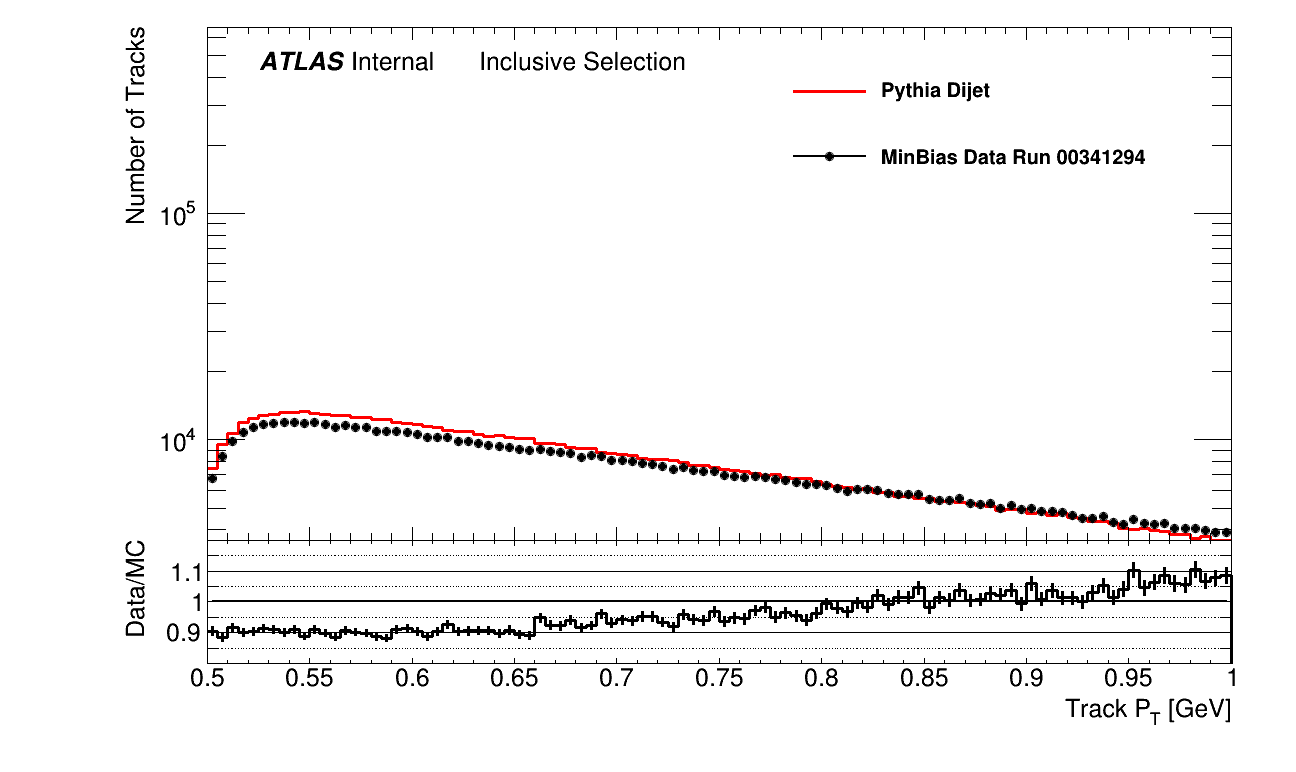

In [8]:
trkPtHistZoom2 = plots.GetHistograms(calc_trkPt,\
                                     list_selections = [],\
                                     bins = 100, \
                                     range_low = 0.5, \
                                     range_high = 1, \
                                     xlabel ="Track P_{T} [GeV]", \
                                     ylabel = "Number of Tracks")
description = "Inclusive Selection"
scale_factor = 50
trkPtHistZoom2Canvas = DrawDataVsMC(trkPtHistZoom2, \
                                    plots.channelLabels, \
                                    MCKey='PythiaJetJet', \
                                    DataKey='MinBiasData',\
                                    ratio_min = 0.8,\
                                    ratio_max = 1.2,\
                                    extra_description = description,\
                                    scale_factor = scale_factor)
trkPtHistZoom2Canvas.Draw()

Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist


Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkPt3 (Potential memory leak).


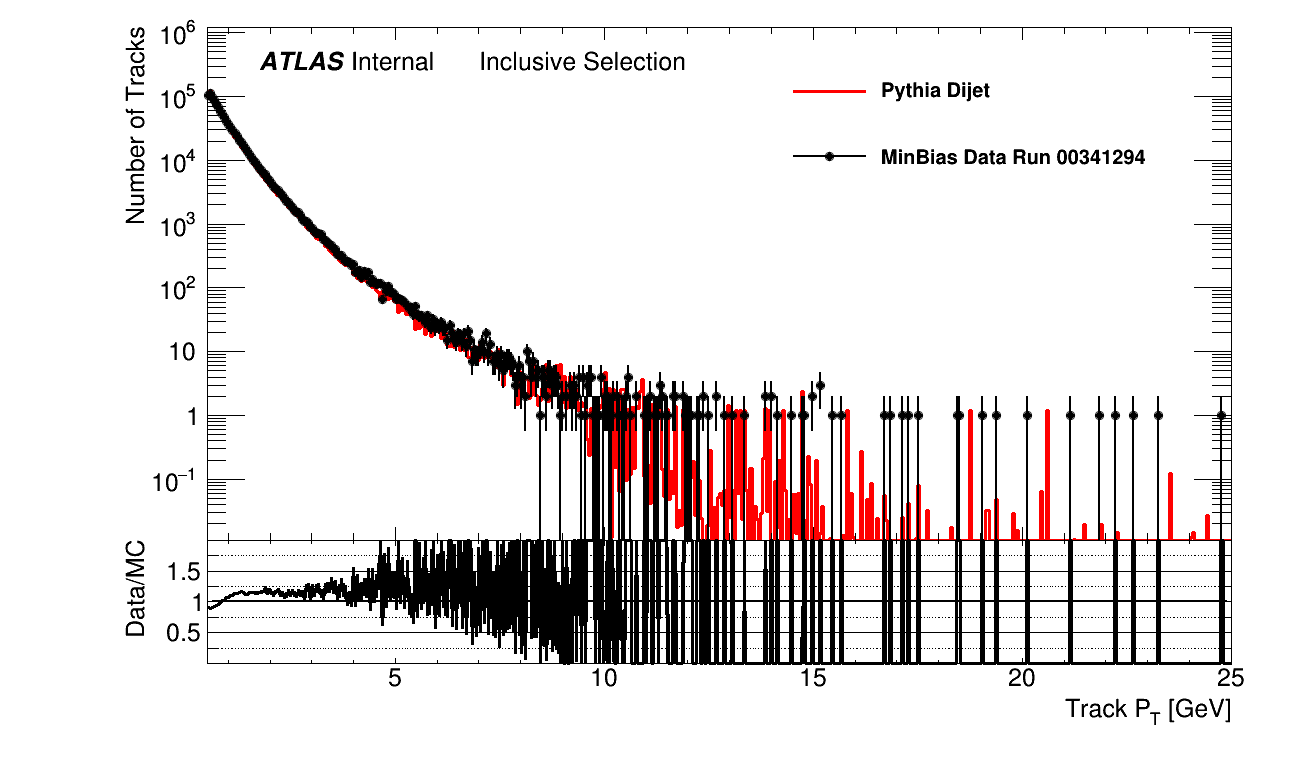

In [9]:
description = "Inclusive Selection"
scale_factor = 10
trkPtHist = plots.GetHistograms(calc_trkPt,\
                                list_selections = [],\
                                bins = 500, \
                                range_low = 0.5, \
                                range_high = 25, \
                                xlabel ="Track P_{T} [GeV]",\
                                ylabel = "Number of Tracks",\
                                )

DataVsMC = DrawDataVsMC(trkPtHist, \
                        plots.channelLabels, \
                        MCKey='PythiaJetJet', \
                        DataKey='MinBiasData',\
                        extra_description = description,\
                        scale_factor = scale_factor)
DataVsMC.Draw()

Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist


Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkEtaID4 (Potential memory leak).


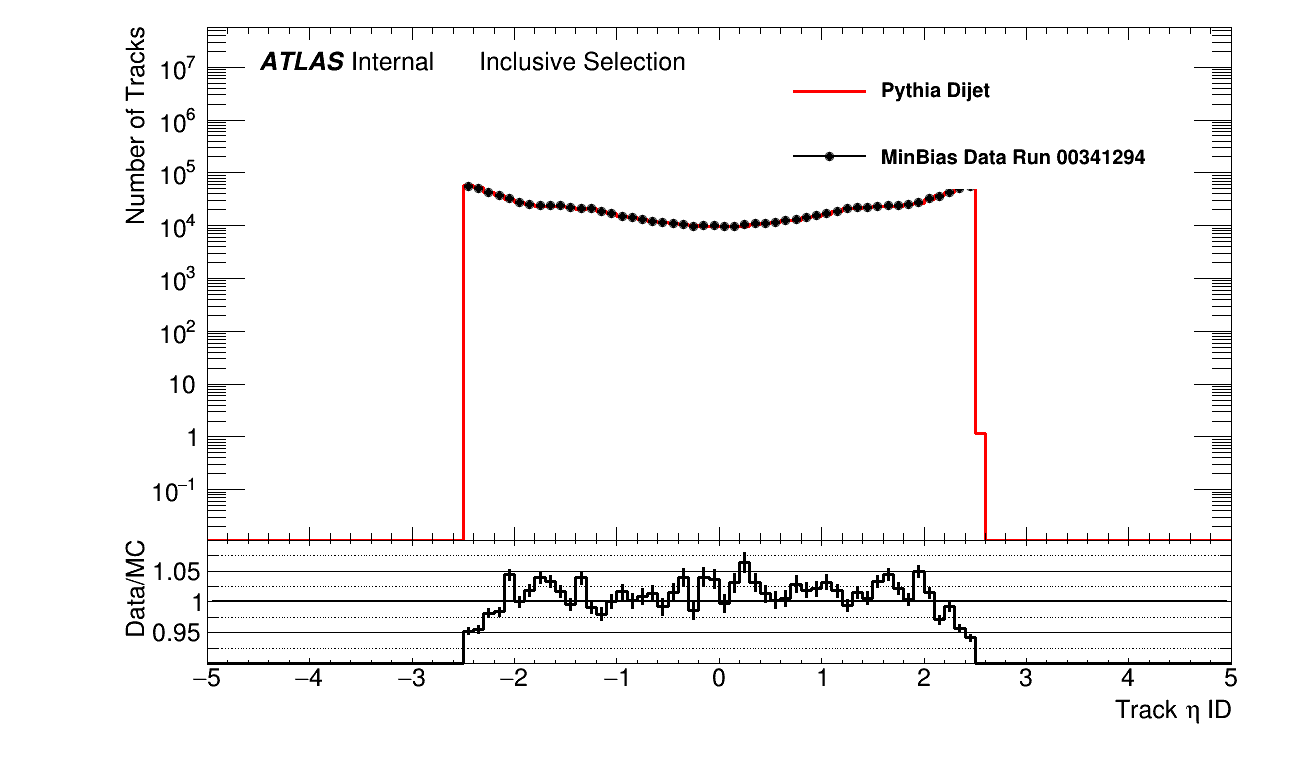

In [10]:
trkEtaIDHist = plots.GetHistograms(calc_trkEtaID, \
                                   list_selections = [],\
                                   bins = 100, \
                                   range_low = -5, \
                                   range_high = +5, \
                                   xlabel ="Track #eta ID", \
                                   ylabel = "Number of Tracks")
description = "Inclusive Selection"
DataVsMCHistCanvas = DrawDataVsMC(trkEtaIDHist, \
                                  plots.channelLabels, \
                                  MCKey='PythiaJetJet', \
                                  DataKey='MinBiasData',\
                                  ratio_min = 0.9,\
                                  ratio_max = 1.1,\
                                  extra_description = description)
DataVsMCHistCanvas.Draw()

Reading files for channel MinBiasData
This many tracks had extensions to both the barrel and the emec 0
[False False False ... False False False]
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
This many tracks had extensions to both the barrel and the emec 0
[False False False ... False False False]
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
This many tracks had extensions to both the barrel and the emec 0
[False False False ... False False False]
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
This many tracks had extensions to both the barrel and the emec 0
[False False

Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkEtaECAL5 (Potential memory leak).


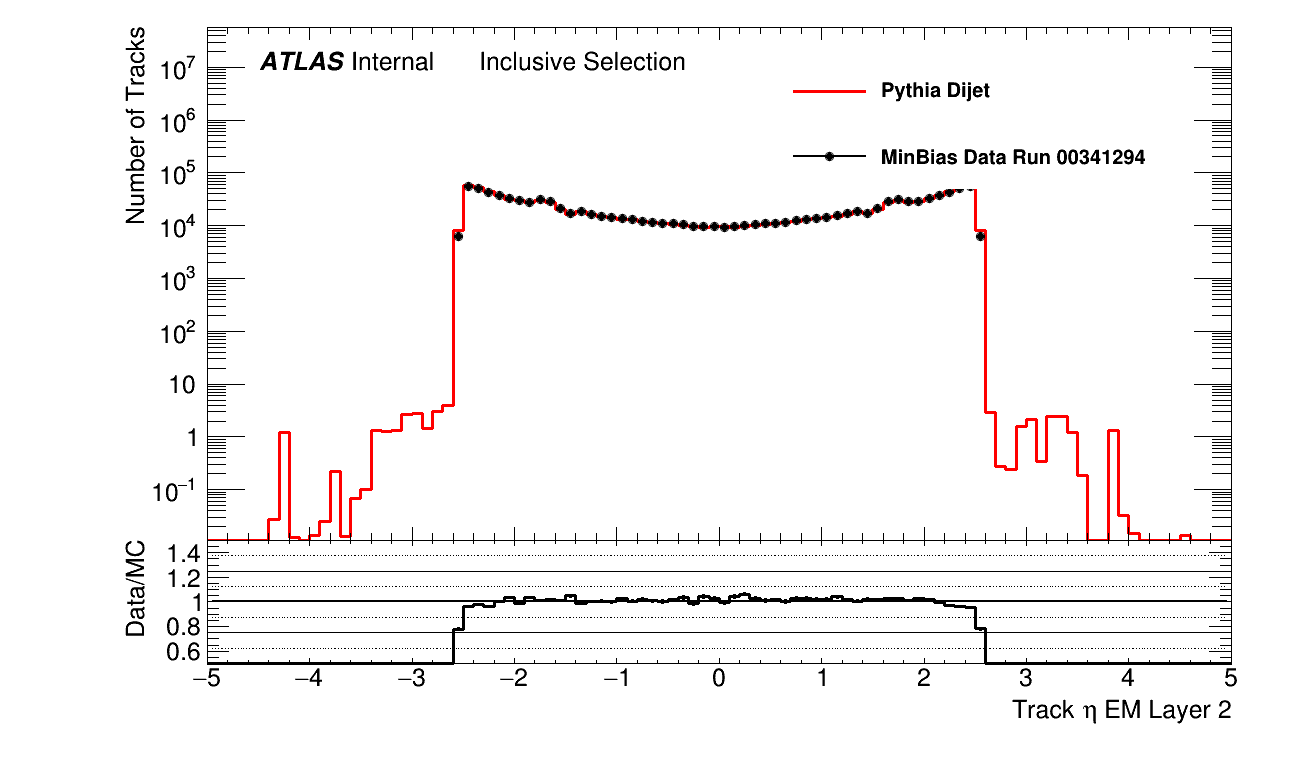

In [11]:
trkEtaECALHist = plots.GetHistograms(calc_trkEtaECAL, \
                                     list_selections = [], \
                                     bins = 100, \
                                     range_low = -5, \
                                     range_high = +5,\
                                     xlabel ="Track #eta EM Layer 2", \
                                     ylabel = "Number of Tracks",\
                                    )
description = "Inclusive Selection"
DataVsMCHistECALCanvas = DrawDataVsMC(trkEtaECALHist, \
                                      plots.channelLabels, \
                                      MCKey='PythiaJetJet',\
                                      DataKey='MinBiasData',\
                                      ratio_min = 0.5,\
                                      ratio_max = 1.5,\
                                      extra_description = description)
DataVsMCHistECALCanvas.Draw()

In [12]:
plots.UseVariableAndHistogramToNormalize(calc_trkPt,\
                                         trkPtHist, \
                                         "PythiaJetJet", \
                                         "MinBiasData",\
                                        )

Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist


Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist


Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkNearestNeighbourEM26 (Potential memory leak).


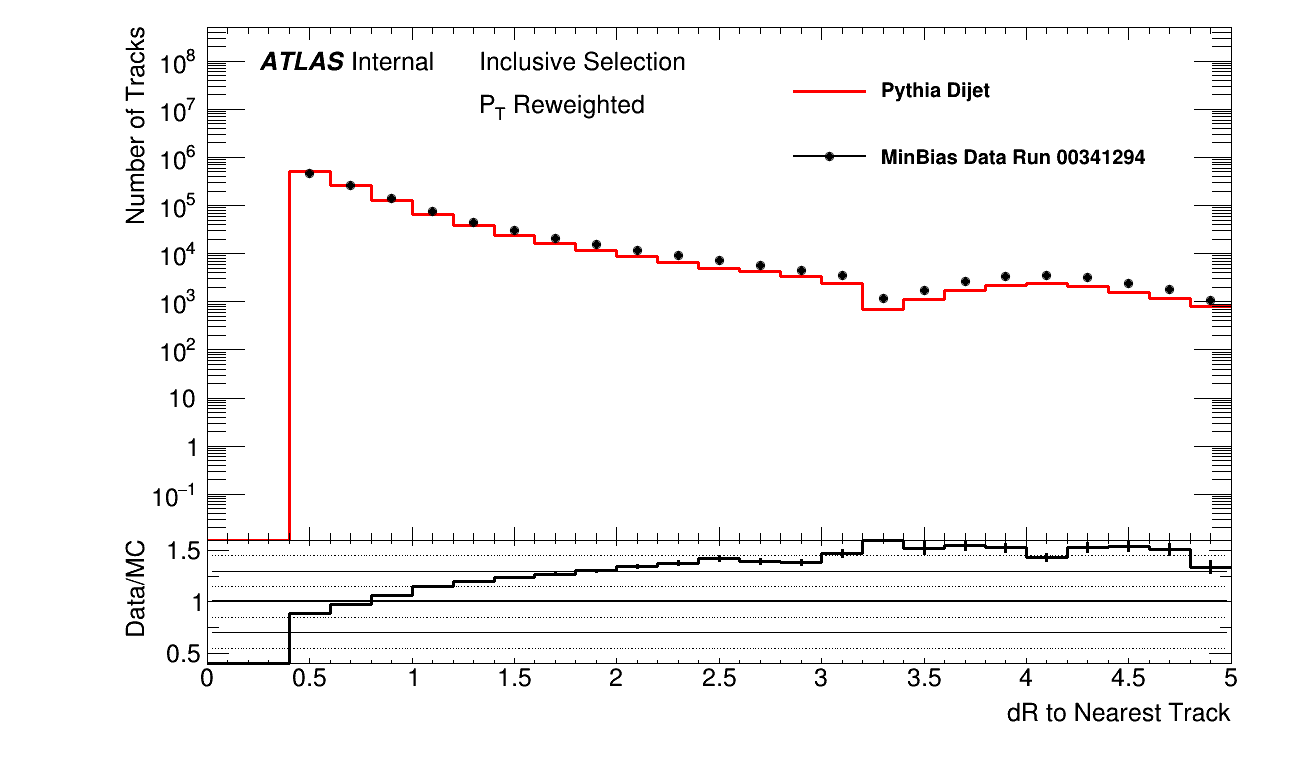

In [13]:
trkNearestDRHist = plots.GetHistograms(calc_trkNearestNeighbourEM2,\
                                list_selections = [],\
                                bins = 25, \
                                range_low = 0.0, \
                                range_high = 5, \
                                xlabel ="dR to Nearest Track",\
                                ylabel = "Number of Tracks",\
                                )
description = ["Inclusive Selection" ,"P_{T} Reweighted"]
DataVsMC = DrawDataVsMC(trkNearestDRHist,\
                        plots.channelLabels,\
                        MCKey='PythiaJetJet',\
                        DataKey='MinBiasData',\
                        ratio_min = 0.2,\
                        ratio_max = 1.8,\
                        extra_description = description)
DataVsMC.Draw()

Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist


Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkPt7 (Potential memory leak).


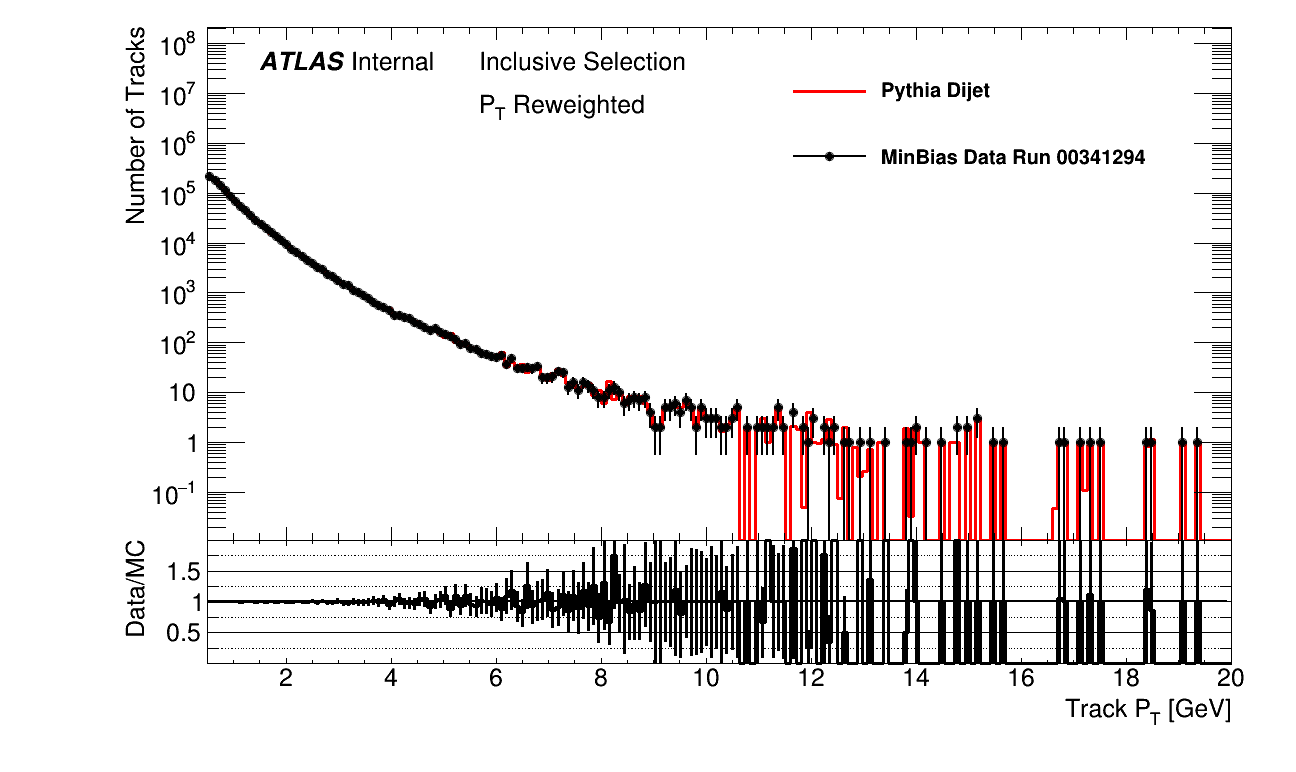

In [14]:
trkPtReweightedHist = plots.GetHistograms(calc_trkPt,\
                                list_selections = [],\
                                bins = 200, \
                                range_low = 0.5, \
                                range_high = 20, \
                                xlabel ="Track P_{T} [GeV]",\
                                ylabel = "Number of Tracks",\
                                )
description = ["Inclusive Selection" , "P_{T} Reweighted"]
DataVsMC = DrawDataVsMC(trkPtReweightedHist, \
                        plots.channelLabels,\
                        MCKey='PythiaJetJet', \
                        DataKey='MinBiasData',\
                        extra_description = description,\
                       )
DataVsMC.Draw()

Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist


Warning in <TROOT::Append>: Replacing existing TH1: HistogramEOP8 (Potential memory leak).


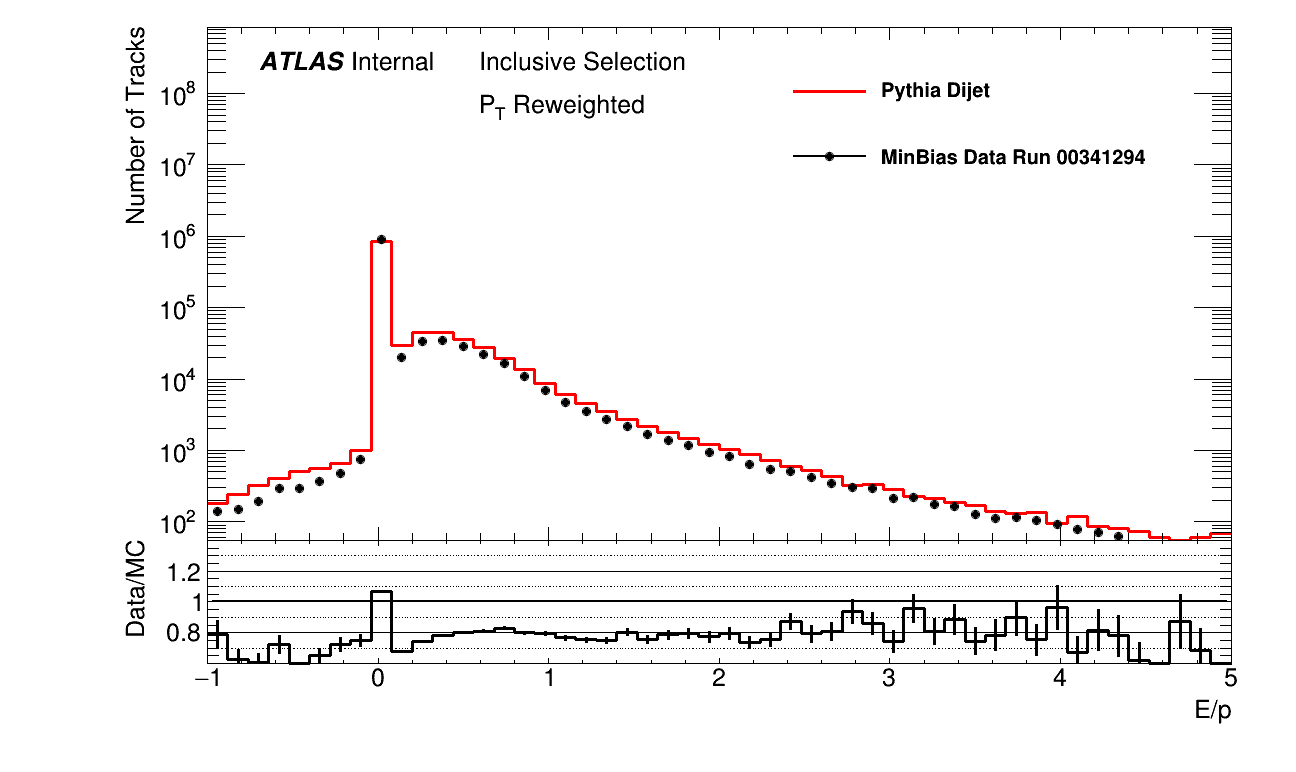

In [15]:
selections = []
trkEOPHist = plots.GetHistograms(calc_EOP, \
                                 list_selections = selections, \
                                 bins = 50, \
                                 range_low = -1, \
                                 range_high = 5, \
                                 xlabel ="E/p", \
                                 ylabel = "Number of Tracks",\
                                 )
description  = ["Inclusive Selection",\
                "P_{T} Reweighted"]
DataVsMCEOP = DrawDataVsMC(trkEOPHist, \
                           plots.channelLabels, \
                           MCKey='PythiaJetJet', \
                           DataKey='MinBiasData', \
                           ratio_min = 0.6,\
                           ratio_max = 1.4,\
                           extra_description = description,\
                           )
DataVsMCEOP.Draw()

Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist


Warning in <TROOT::Append>: Replacing existing TH1: HistogramEOPPGreater1ECALEta0_69 (Potential memory leak).


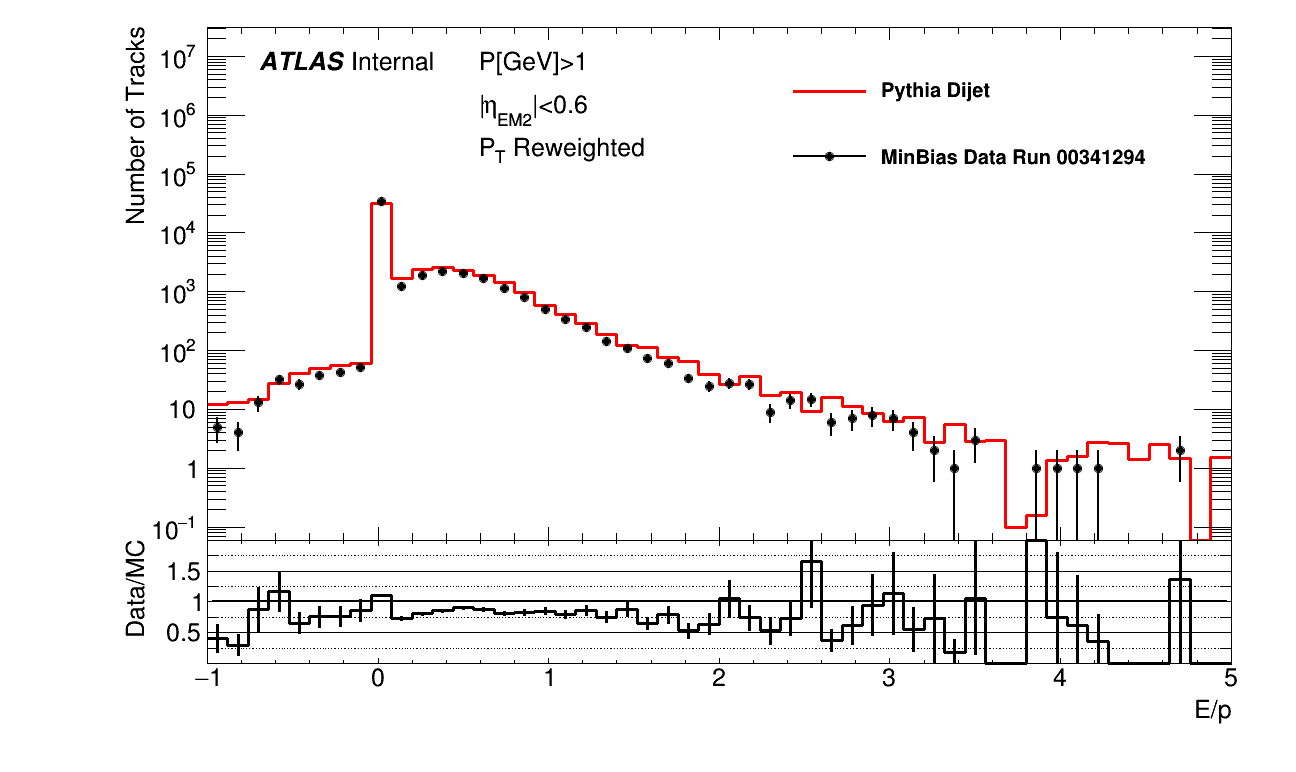

In [16]:
selections = [sel_PGreater1, sel_ECALEta0_6]
trkEOPHistPGreater1 = plots.GetHistograms(calc_EOP, \
                                          list_selections = selections, \
                                          bins = 50, \
                                          range_low = -1, \
                                          range_high = 5, \
                                          xlabel ="E/p", \
                                          ylabel = "Number of Tracks")
description = ["P[GeV]>1", \
               "|#eta_{EM2}|<0.6", \
               "P_{T} Reweighted"]
DataVsMCEOP = DrawDataVsMC(trkEOPHistPGreater1,\
                           plots.channelLabels, \
                           MCKey='PythiaJetJet',\
                           DataKey='MinBiasData',\
                           extra_description = description)
DataVsMCEOP.Draw()

Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist


Warning in <TROOT::Append>: Replacing existing TH1: HistogramEOPPGreater1_5IDEta0_610 (Potential memory leak).


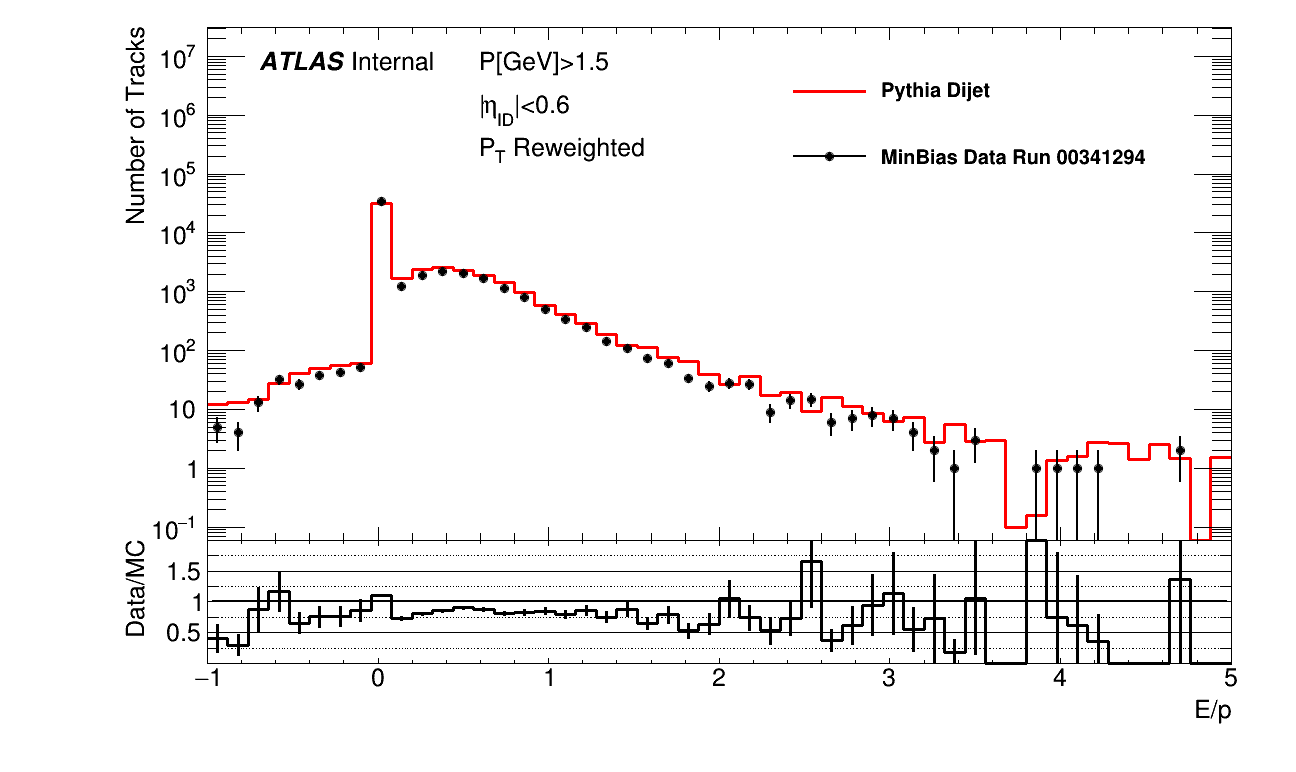

In [17]:
selections = [sel_PGreater1_5, sel_IDEta0_6]
trkEOPHistPGreater1_5 = plots.GetHistograms(calc_EOP,\
                                            list_selections = selections, \
                                            bins = 50, \
                                            range_low = -1, \
                                            range_high = 5, \
                                            xlabel ="E/p", \
                                            ylabel = "Number of Tracks")
description = ["P[GeV]>1.5",\
               "|#eta_{ID}|<0.6",\
               "P_{T} Reweighted"]
DataVsMCEOP = DrawDataVsMC(trkEOPHistPGreater1, \
                           plots.channelLabels, \
                           MCKey='PythiaJetJet',\
                           DataKey='MinBiasData',\
                           extra_description = description)
DataVsMCEOP.Draw()

Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist


Warning in <TROOT::Append>: Replacing existing TH1: HistogramEOPPGreater2IDEta0_611 (Potential memory leak).


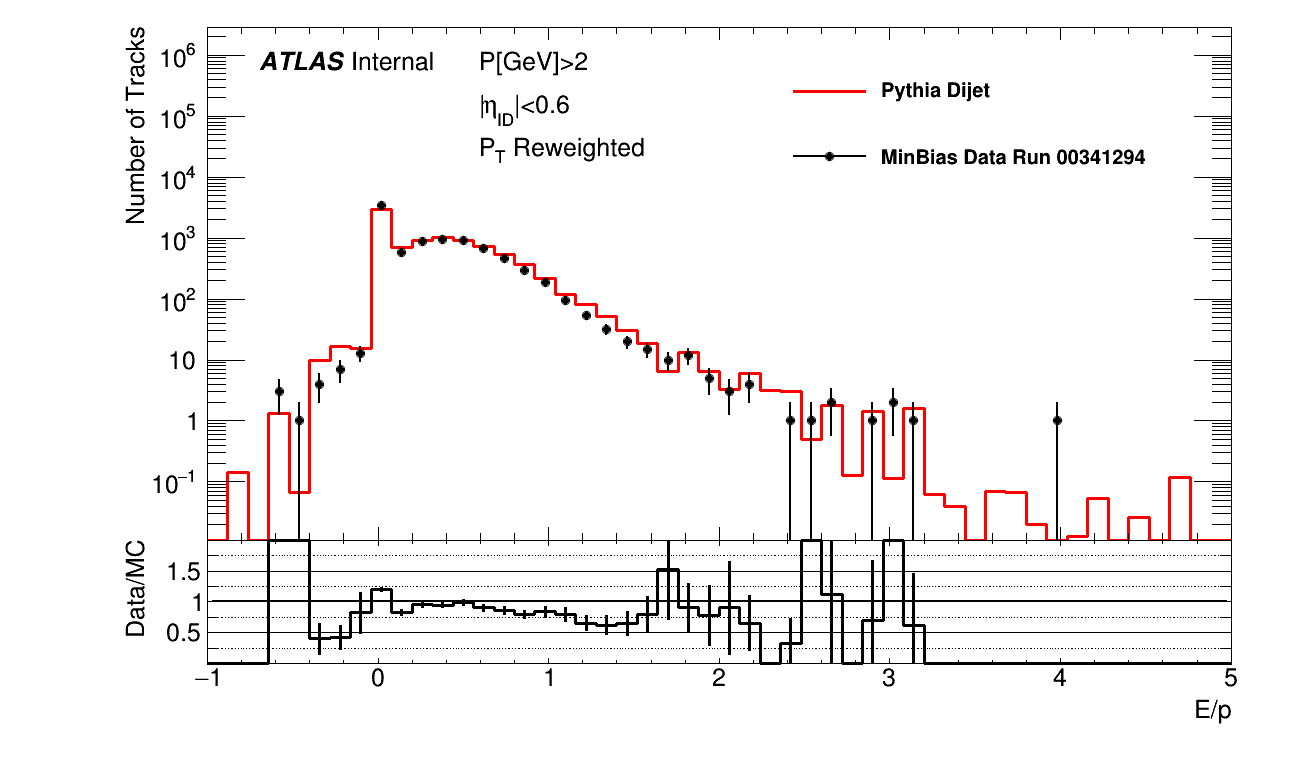

In [18]:
selections = [sel_PGreater2, sel_IDEta0_6]
trkEOPHistPGreater2 = plots.GetHistograms(calc_EOP,\
                                          list_selections = selections,\
                                          bins = 50, \
                                          range_low = -1,\
                                          range_high = 5,\
                                          xlabel ="E/p", \
                                          ylabel = "Number of Tracks",\
                                          )
description = ["P[GeV]>2", \
               "|#eta_{ID}|<0.6",\
               "P_{T} Reweighted"]
DataVsMCEOP = DrawDataVsMC(trkEOPHistPGreater2, \
                           plots.channelLabels, \
                           MCKey='PythiaJetJet', \
                           DataKey='MinBiasData',\
                           extra_description = description)
DataVsMCEOP.Draw()

Now Lets try to reproduce some of the Run 1 paper results. We'll go through the figures one-by-one

In [19]:
from selections.selections import sel_IDEta19_23, sel_IDEta0_6, sel_PBetween12_18, sel_PBetween22_28, sel_PBetween28_36

This is figure 2a and 2d in the paper:

Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist


Warning in <TROOT::Append>: Replacing existing TH1: HistogramEOPPBetween12_18IDEta0_612 (Potential memory leak).


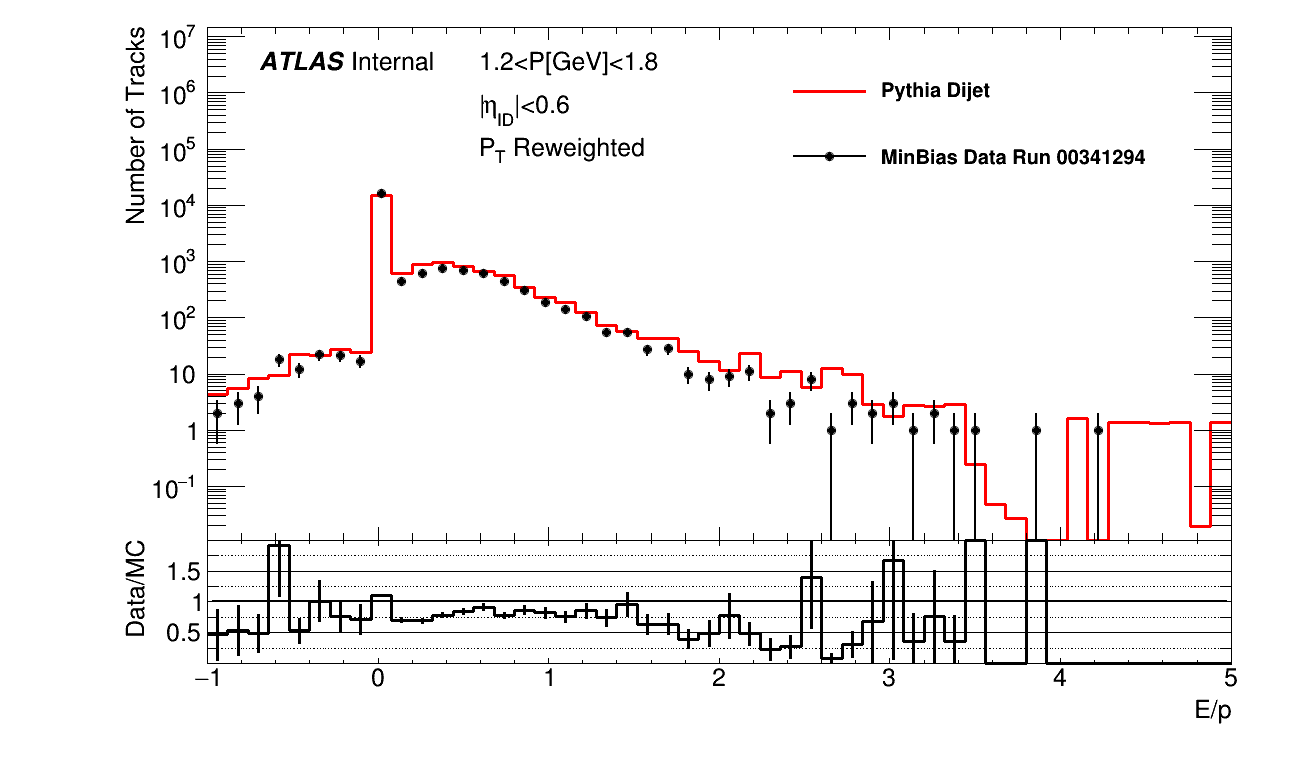

In [20]:
selections = [sel_PBetween12_18, sel_IDEta0_6]
trkEOPHistFig2a = plots.GetHistograms(calc_EOP,\
                                          list_selections = selections,\
                                          bins = 50, \
                                          range_low = -1,\
                                          range_high = 5,\
                                          xlabel ="E/p", \
                                          ylabel = "Number of Tracks",\
                                          )
description = ["1.2<P[GeV]<1.8",\
               "|#eta_{ID}|<0.6",\
               "P_{T} Reweighted"]
DataVsMCEOP = DrawDataVsMC(trkEOPHistFig2a, \
                           plots.channelLabels, \
                           MCKey='PythiaJetJet', \
                           DataKey='MinBiasData',\
                           extra_description = description)
DataVsMCEOP.Draw()

This is figure 2b in the paper:

Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist


Warning in <TROOT::Append>: Replacing existing TH1: HistogramEOPPBetween12_18IDEta0_613 (Potential memory leak).


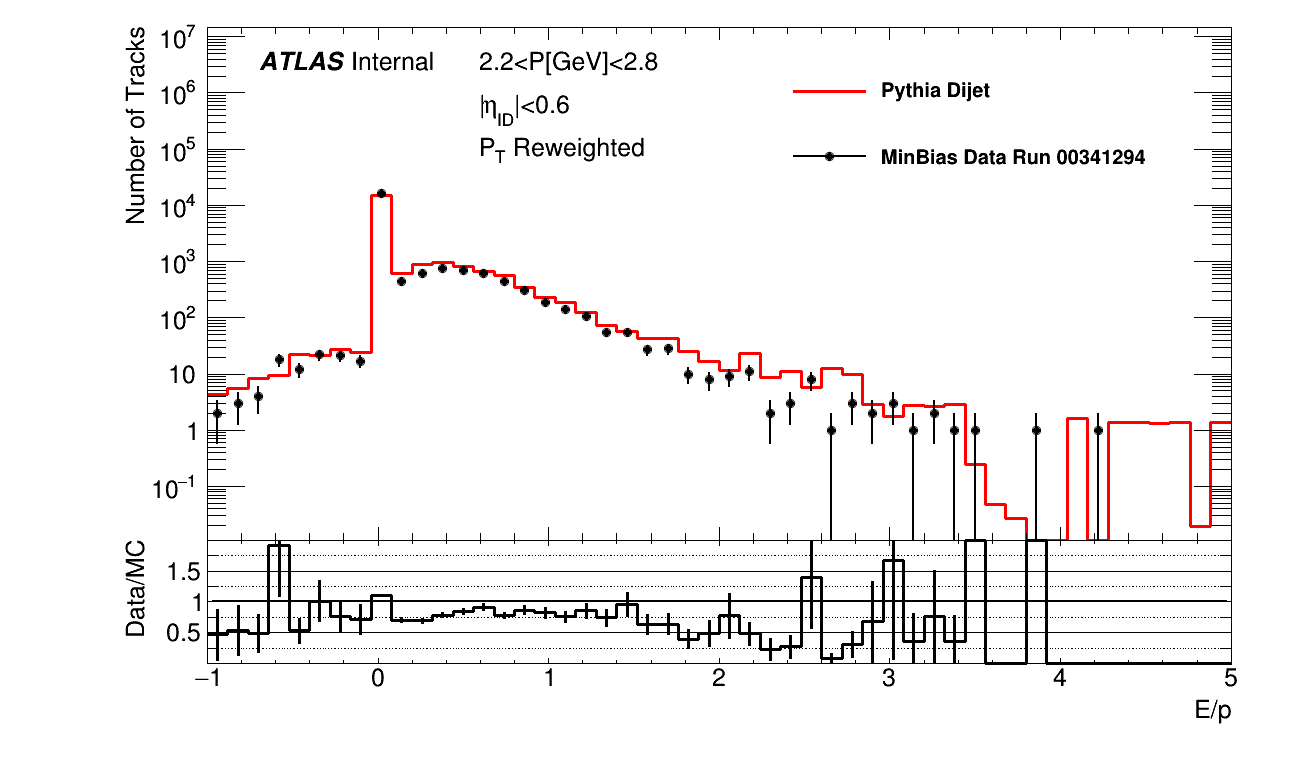

In [21]:
from selections.selections import sel_PBetween12_18
selections = [sel_PBetween12_18, sel_IDEta0_6]
trkEOPHistFig2b = plots.GetHistograms(calc_EOP,\
                                          list_selections = selections,\
                                          bins = 50, \
                                          range_low = -1,\
                                          range_high = 5,\
                                          xlabel ="E/p", \
                                          ylabel = "Number of Tracks",\
                                          )
description = ["2.2<P[GeV]<2.8", \
               "|#eta_{ID}|<0.6",\
               "P_{T} Reweighted"]
DataVsMCEOP = DrawDataVsMC(trkEOPHistFig2b, \
                           plots.channelLabels, \
                           MCKey='PythiaJetJet', \
                           DataKey='MinBiasData',\
                           extra_description = description)
DataVsMCEOP.Draw()

This is figure 2c in the paper:

Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist


Warning in <TROOT::Append>: Replacing existing TH1: HistogramEOPPBetween28_36IDEta19_2314 (Potential memory leak).


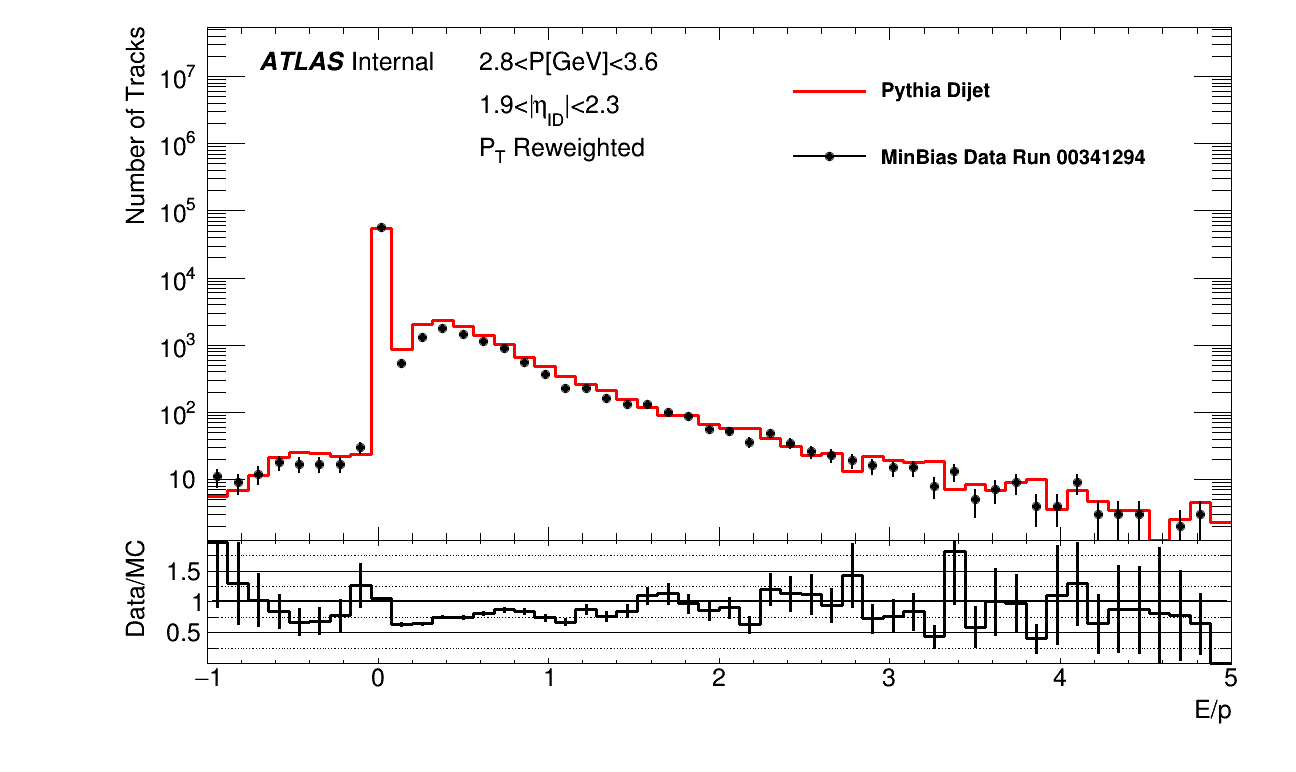

In [22]:
selections = [sel_PBetween28_36, sel_IDEta19_23]
trkEOPHistFig2c = plots.GetHistograms(calc_EOP,\
                                          list_selections = selections,\
                                          bins = 50, \
                                          range_low = -1,\
                                          range_high = 5,\
                                          xlabel ="E/p", \
                                          ylabel = "Number of Tracks",\
                                          )
description = ["2.8<P[GeV]<3.6", \
               "1.9<|#eta_{ID}|<2.3",\
               "P_{T} Reweighted"]
DataVsMCEOP = DrawDataVsMC(trkEOPHistFig2c, \
                           plots.channelLabels, \
                           MCKey='PythiaJetJet', \
                           DataKey='MinBiasData',\
                           extra_description = description)
DataVsMCEOP.Draw()

This is figure 3a in the paper:

Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for 

Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkP15 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkPELessEqual016 (Potential memory leak).


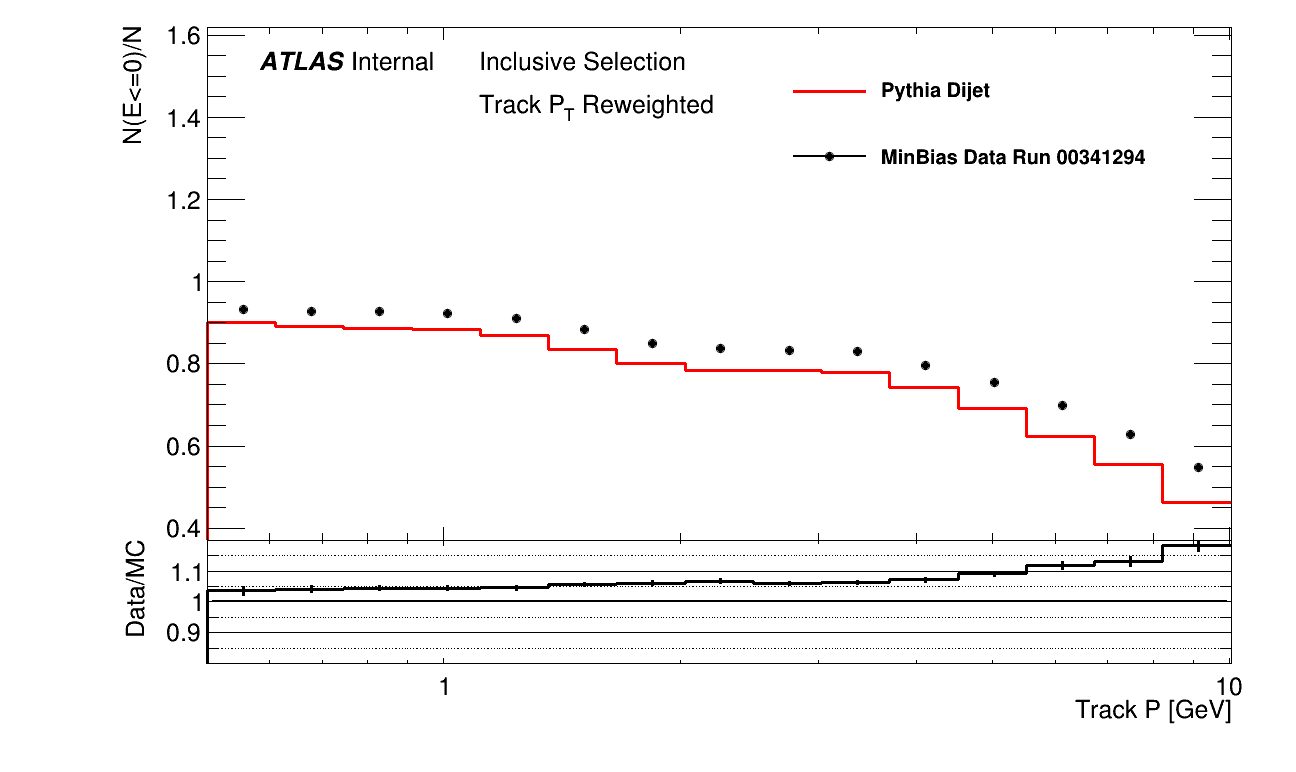

In [23]:
selections = []
binMax = 10.05
binLow = 0.5
nBins = 15
base = (binMax/binLow) ** (1./float(nBins))
bins = []
for i in range(0, nBins + 1):
    bins.append(0.5 * (base) ** i )
trkMultiplicity = plots.GetHistograms(calc_trkP,\
                                      list_selections = selections,\
                                      bins = bins, \
                                      xlabel ="Track P [GeV]", \
                                      ylabel = "Number of Tracks",\
                                      )
from selections.selections import sel_ELessEqual0
selections = [sel_ELessEqual0]
trkMultiplicity_ELessZero = plots.GetHistograms(calc_trkP,\
                                      list_selections = selections,\
                                      bins = bins, \
                                      xlabel ="Track P [GeV]", \
                                      ylabel = "N(E<=0)/N",\
                                      )
ratio_histogram = DivideHistograms(trkMultiplicity_ELessZero, trkMultiplicity)
description = ["Inclusive Selection",\
               "Track P_{T} Reweighted"]
scale_factor = 5.0
DataVsMCTrackLess0 = DrawDataVsMC(ratio_histogram, \
                           plots.channelLabels, \
                           MCKey='PythiaJetJet', \
                           DataKey='MinBiasData',\
                           extra_description = description,\
                           scale_factor = scale_factor,\
                           ratio_min = 0.8,\
                           ratio_max = 1.2,\
                           doLogx = True,
                           doLogy = False,
                           xTicksNumber = 414)
DataVsMCTrackLess0.Draw()

Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for 

Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkEtaID17 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkEtaIDELessEqual018 (Potential memory leak).


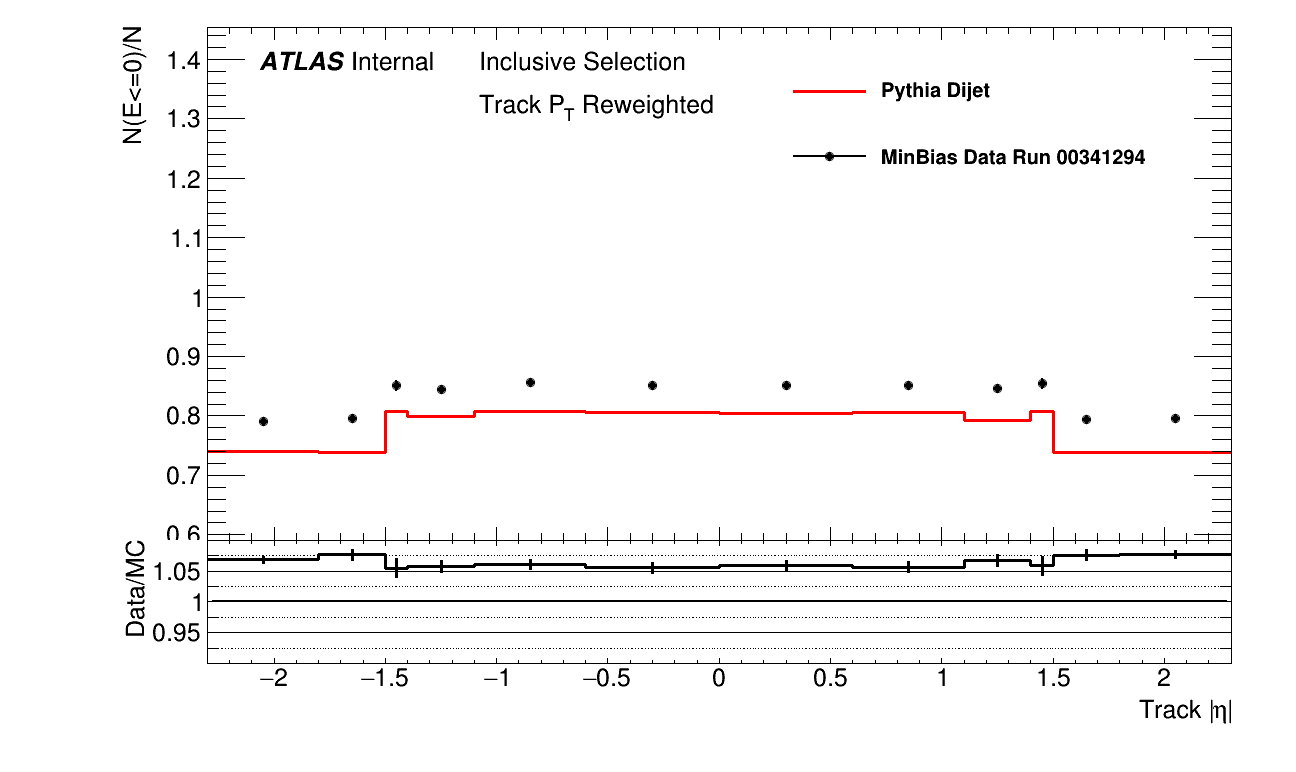

In [24]:
bins = [-2.3, -1.8, -1.5, -1.4, -1.1, -0.6, 0.0, 0.6, 1.1, 1.4, 1.5, 1.8, 2.3]
selections = []
trkMultiplicity_Eta = plots.GetHistograms(calc_trkEtaID,\
                                      list_selections = selections,\
                                      bins = bins, \
                                      xlabel ="Track |#eta|", \
                                      ylabel = "Number of Tracks",\
                                      )
from selections.selections import sel_ELessEqual0
selections = [sel_ELessEqual0]
trkMultiplicity_Eta_Zero = plots.GetHistograms(calc_trkEtaID,\
                                      list_selections = selections,\
                                      bins = bins, \
                                      xlabel ="Track |#eta|", \
                                      ylabel = "N(E<=0)/N",\
                                      )
ratio_histogram = DivideHistograms(trkMultiplicity_Eta_Zero, trkMultiplicity_Eta)
description = ["Inclusive Selection",\
               "Track P_{T} Reweighted"]
scale_factor = 5.0
DataVsMCTrackLess0 = DrawDataVsMC(ratio_histogram, \
                           plots.channelLabels, \
                           MCKey='PythiaJetJet', \
                           DataKey='MinBiasData',\
                           extra_description = description,\
                           scale_factor = scale_factor,\
                           ratio_min = 0.9,\
                           ratio_max = 1.1,\
                           doLogx = False,
                           doLogy = False)
DataVsMCTrackLess0.Draw()

Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for 

Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkEtaID_ABS19 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkEtaID_ABSELessEqual020 (Potential memory leak).


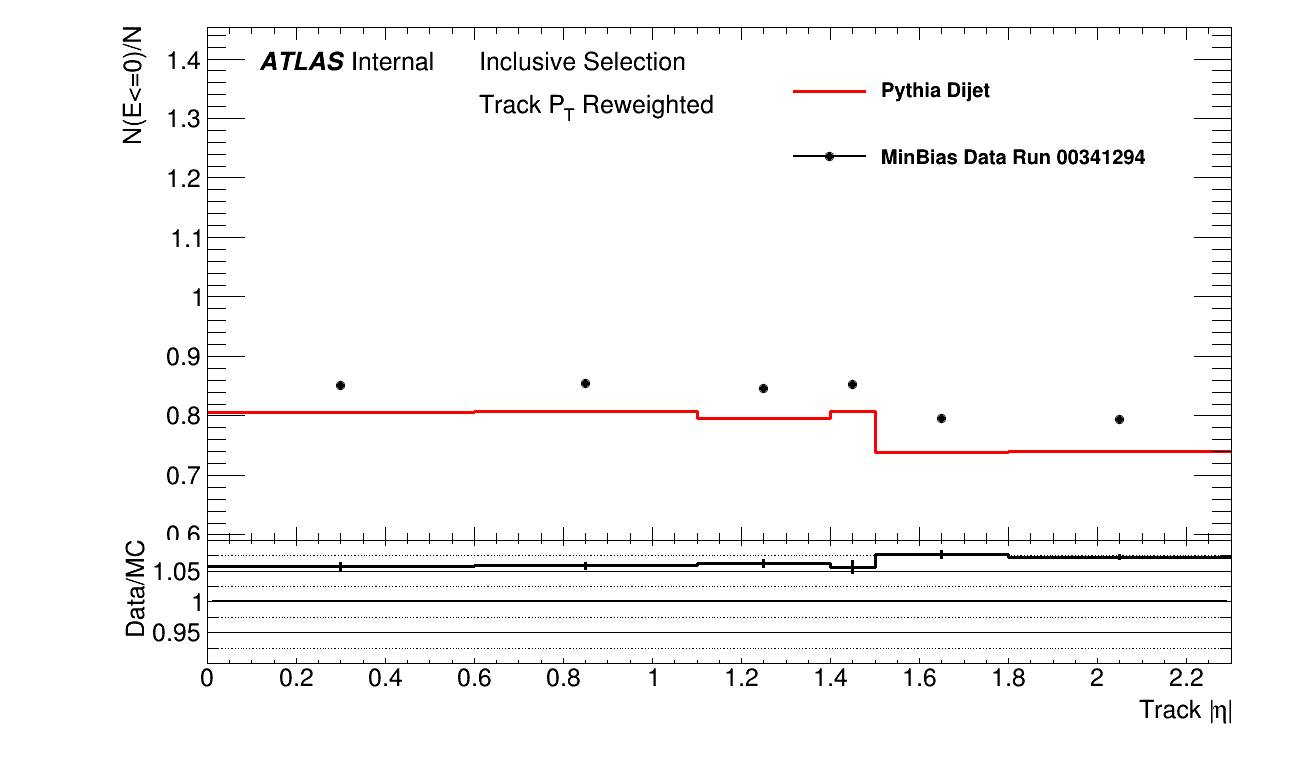

In [25]:
bins = [0.0, 0.6, 1.1, 1.4, 1.5, 1.8, 2.3]
selections = []
from variables.variables import calc_trkEta_ABS
trkMultiplicity_Eta = plots.GetHistograms(calc_trkEta_ABS,\
                                      list_selections = selections,\
                                      bins = bins, \
                                      xlabel ="Track |#eta|", \
                                      ylabel = "Number of Tracks",\
                                      )
from selections.selections import sel_ELessEqual0
selections = [sel_ELessEqual0]
trkMultiplicity_Eta_Zero = plots.GetHistograms(calc_trkEta_ABS,\
                                      list_selections = selections,\
                                      bins = bins, \
                                      xlabel ="Track |#eta|", \
                                      ylabel = "N(E<=0)/N",\
                                      )
ratio_histogram = DivideHistograms(trkMultiplicity_Eta_Zero, trkMultiplicity_Eta)
description = ["Inclusive Selection",\
               "Track P_{T} Reweighted"]
scale_factor = 5.0
DataVsMCTrackLess0 = DrawDataVsMC(ratio_histogram, \
                           plots.channelLabels, \
                           MCKey='PythiaJetJet', \
                           DataKey='MinBiasData',\
                           extra_description = description,\
                           scale_factor = scale_factor,\
                           ratio_min = 0.9,\
                           ratio_max = 1.1,\
                           doLogx = False,
                           doLogy = False)
DataVsMCTrackLess0.Draw()

Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for 

Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkEtaID_ABS21 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkEtaID_ABSELessEqual022 (Potential memory leak).


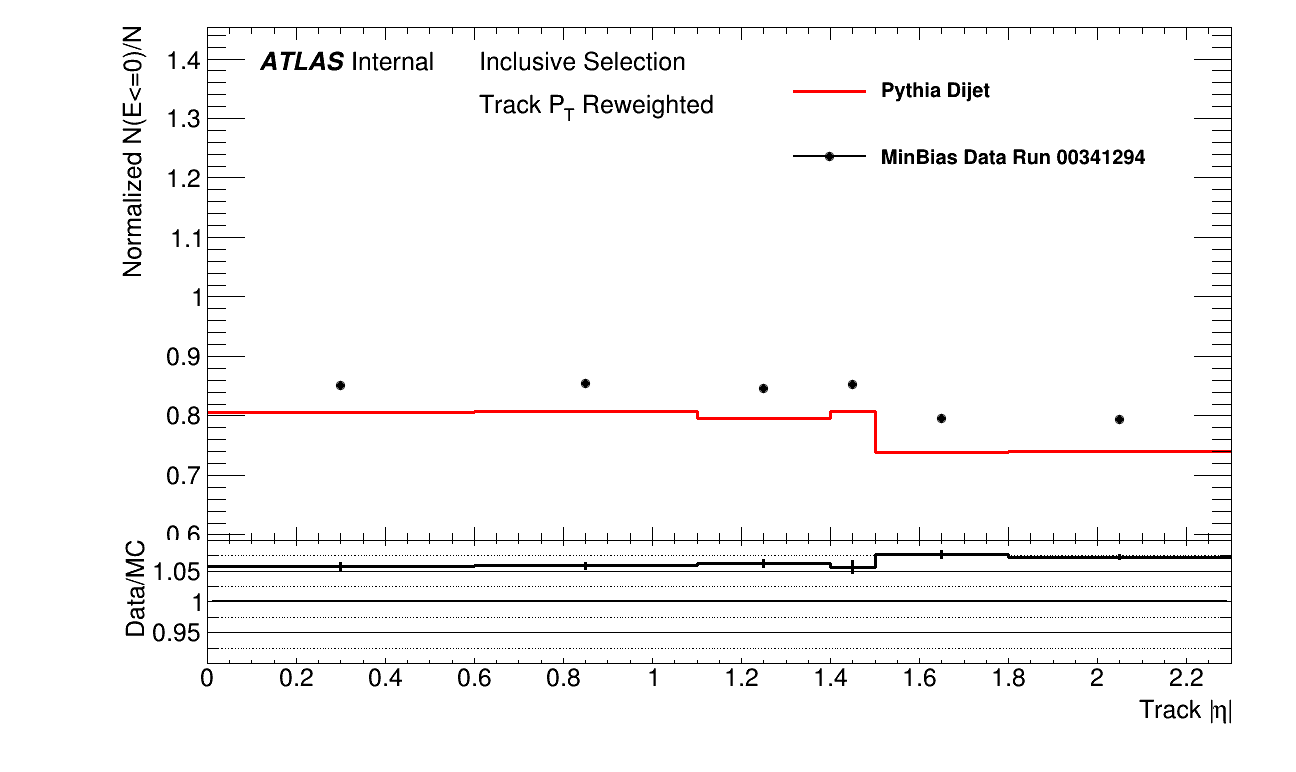

In [26]:
bins = [0.0, 0.6, 1.1, 1.4, 1.5, 1.8, 2.3]
selections = []
from variables.variables import calc_trkEta_ABS
trkMultiplicity_Eta = plots.GetHistograms(calc_trkEta_ABS,\
                                      list_selections = selections,\
                                      bins = bins, \
                                      xlabel ="Track |#eta|", \
                                      ylabel = "Normalized",\
                                      normalize = True,\
                                      )
from selections.selections import sel_ELessEqual0
selections = [sel_ELessEqual0]
trkMultiplicity_Eta_Zero = plots.GetHistograms(calc_trkEta_ABS,\
                                      list_selections = selections,\
                                      bins = bins, \
                                      xlabel ="Track |#eta|", \
                                      ylabel = "Normalized N(E<=0)/N",\
                                      normalize = True,\
                                      )
ratio_histogram = DivideHistograms(trkMultiplicity_Eta_Zero, trkMultiplicity_Eta)
description = ["Inclusive Selection",\
               "Track P_{T} Reweighted"]
scale_factor = 5.0
DataVsMCTrackLess0 = DrawDataVsMC(ratio_histogram, \
                           plots.channelLabels, \
                           MCKey='PythiaJetJet', \
                           DataKey='MinBiasData',\
                           extra_description = description,\
                           scale_factor = scale_factor,\
                           ratio_min = 0.9,\
                           ratio_max = 1.1,\
                           doLogx = False,
                           doLogy = False)
DataVsMCTrackLess0.Draw()

In [36]:

from variables.variables import calc_trkEta_ABS
    
base_description = ["Track P_{T} Reweighted"]



etaSelections = [sel_IDEta0_6, \
                 sel_IDEta06_11, \
                 sel_IDEta11_14, \
                 sel_IDEta14_15, \
                 sel_IDEta15_18, \
                 sel_IDEta18_23]

eta_selectionDescriptions = ["|#eta_{ID}|<0.6",\
                           "0.6<|#eta_{ID}|<1.1",\
                           "1.1<|#eta_{ID}|<1.4",\
                           "1.4<|#eta_{ID}|<1.5",\
                           "1.5<|#eta_{ID}|<1.8",\
                           "1.8<|#eta_{ID}|<2.3"]

binMax = 10.05
binLow = 0.5
nBins = 15
base = (binMax/binLow) ** (1./float(nBins))
bins = []
for i in range(0, nBins + 1):
    bins.append(0.5 * (base) ** i )
    
canvases = []
keep_histograms_alive = []
    
for (etaSelection, eta_selectionDescription) in zip(etaSelections, eta_selectionDescriptions):
    #do the eta selection and count the inclusive number of tracks in the bin
    selections = [etaSelection]
    trkMultiplicity_Eta = plots.GetHistograms(calc_trkP,\
                                      list_selections = selections,\
                                      bins = bins, \
                                      xlabel ="Track P [GeV]", \
                                      ylabel = "Normalized",\
                                      normalize = True,\
                                      )
    
    #do the eta selections and count the number of tracks with an energy deposity less than or equal to 0.0.
    from selections.selections import sel_ELessEqual0
    selections = [sel_ELessEqual0] + [etaSelection]
    trkMultiplicity_Eta_Zero = plots.GetHistograms(calc_trkP,\
                                      list_selections = selections,\
                                      bins = bins, \
                                      xlabel ="Track P [GeV]", \
                                      ylabel = "Normalized N(E<=0)/N",\
                                      normalize = True,\
                                      )
    ratio_histogram = DivideHistograms(trkMultiplicity_Eta_Zero, trkMultiplicity_Eta)
    keep_histograms_alive.append(ratio_histogram)
    description = [eta_selectionDescription] + base_description
    scale_factor = 5.0
    DataVsMCTrackLess0 = DrawDataVsMC(ratio_histogram, \
                           plots.channelLabels, \
                           MCKey='PythiaJetJet', \
                           DataKey='MinBiasData',\
                           extra_description = description,\
                           scale_factor = scale_factor,\
                           ratio_min = 0.8,\
                           ratio_max = 1.2,\
                           doLogx = True,
                           doLogy = False)
    canvases.append(DataVsMCTrackLess0)
    

Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for 

Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
Reading files for channel MinBiasData
no normalization weights found for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Reading files for channel PythiaJetJet
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Found renormalization weights for file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist


Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkPIDEta0_635 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkPELessEqual0IDEta0_636 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkPIDEta06_1137 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkPELessEqual0IDEta06_1138 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkPIDEta11_1439 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkPELessEqual0IDEta11_1440 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkPIDEta14_1541 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkPELessEqual0IDEta14_1542 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HistogramtrkPIDEta15_1843 (Potential memory leak).
Warning in <TROOT::Append>: Repla

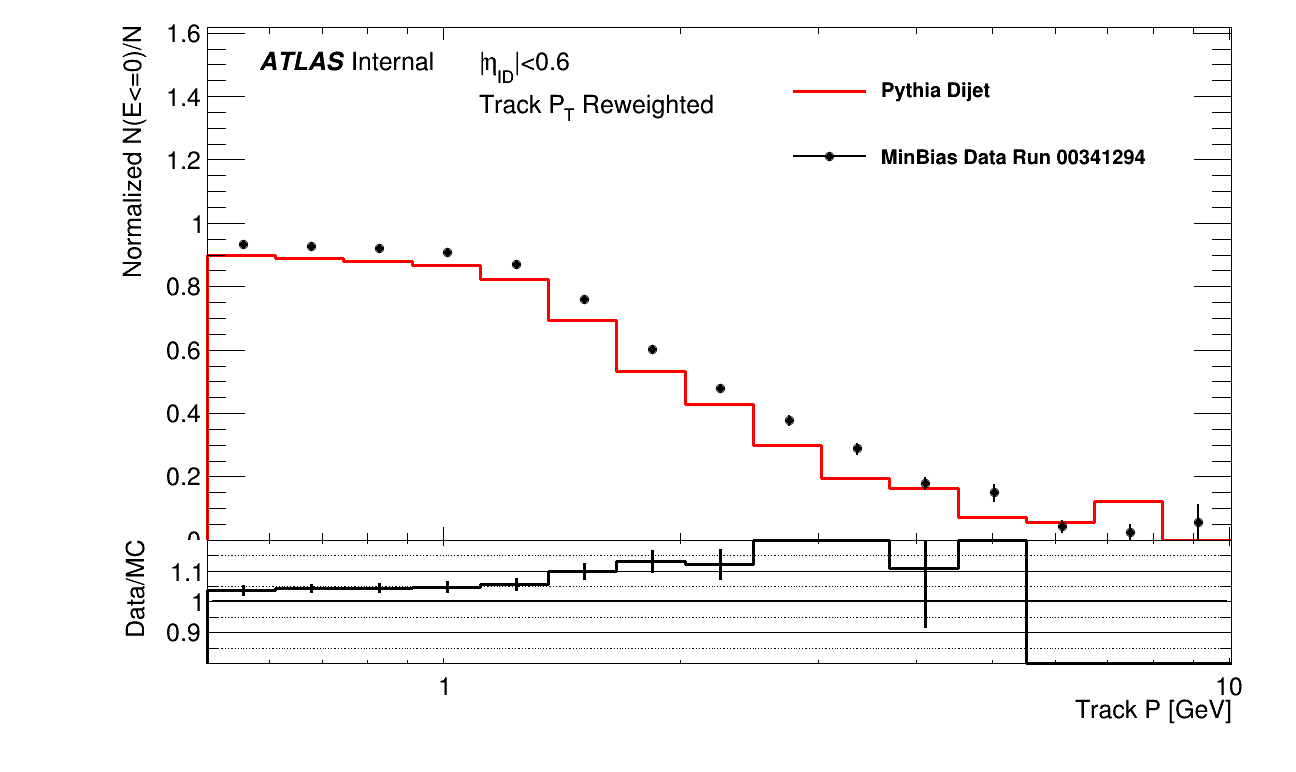

In [37]:
canvases[0].Draw()

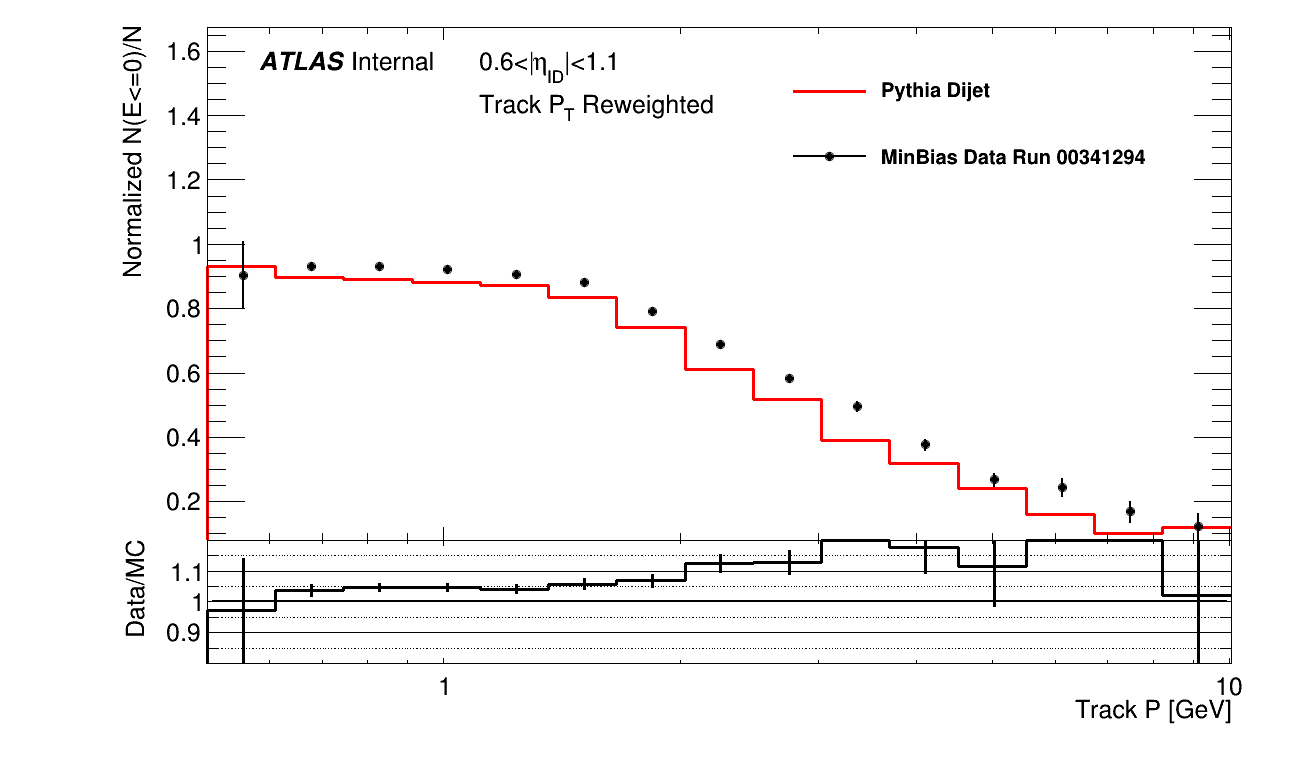

In [38]:
canvases[1].Draw()

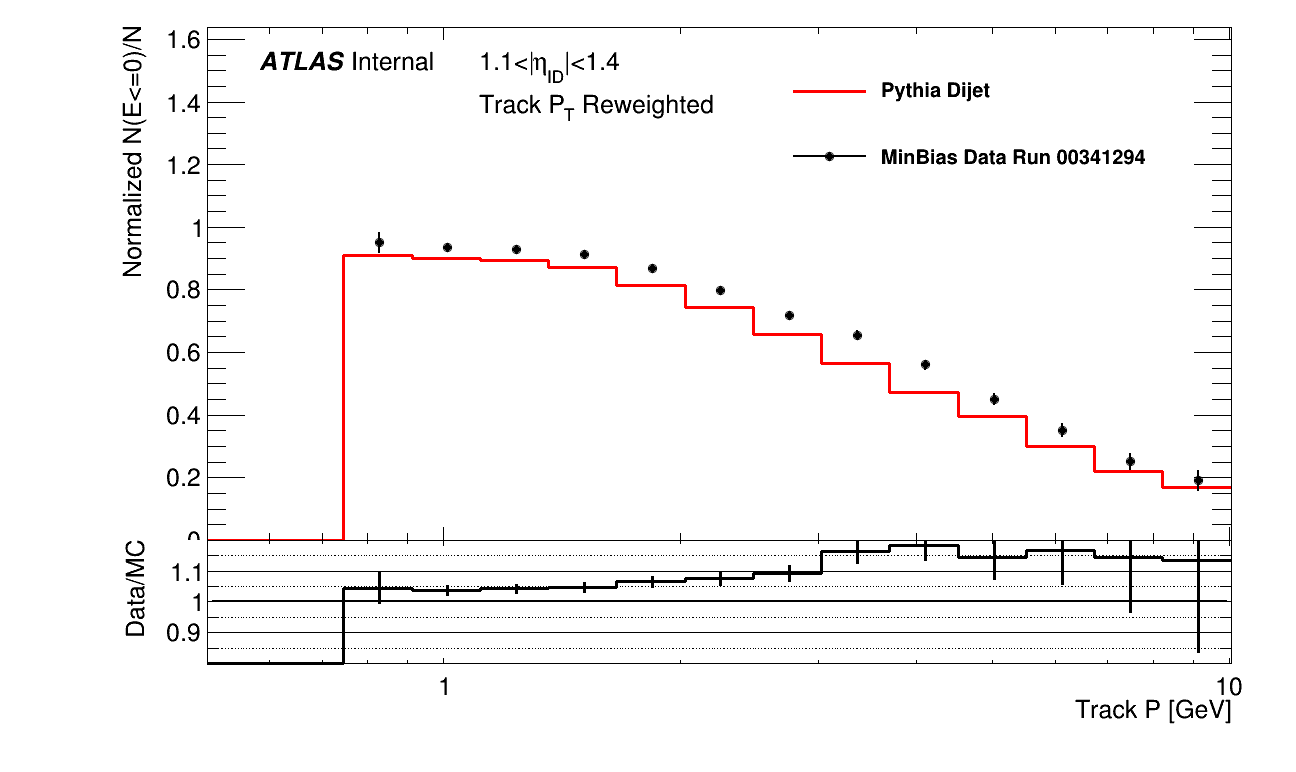

In [39]:
canvases[2].Draw()

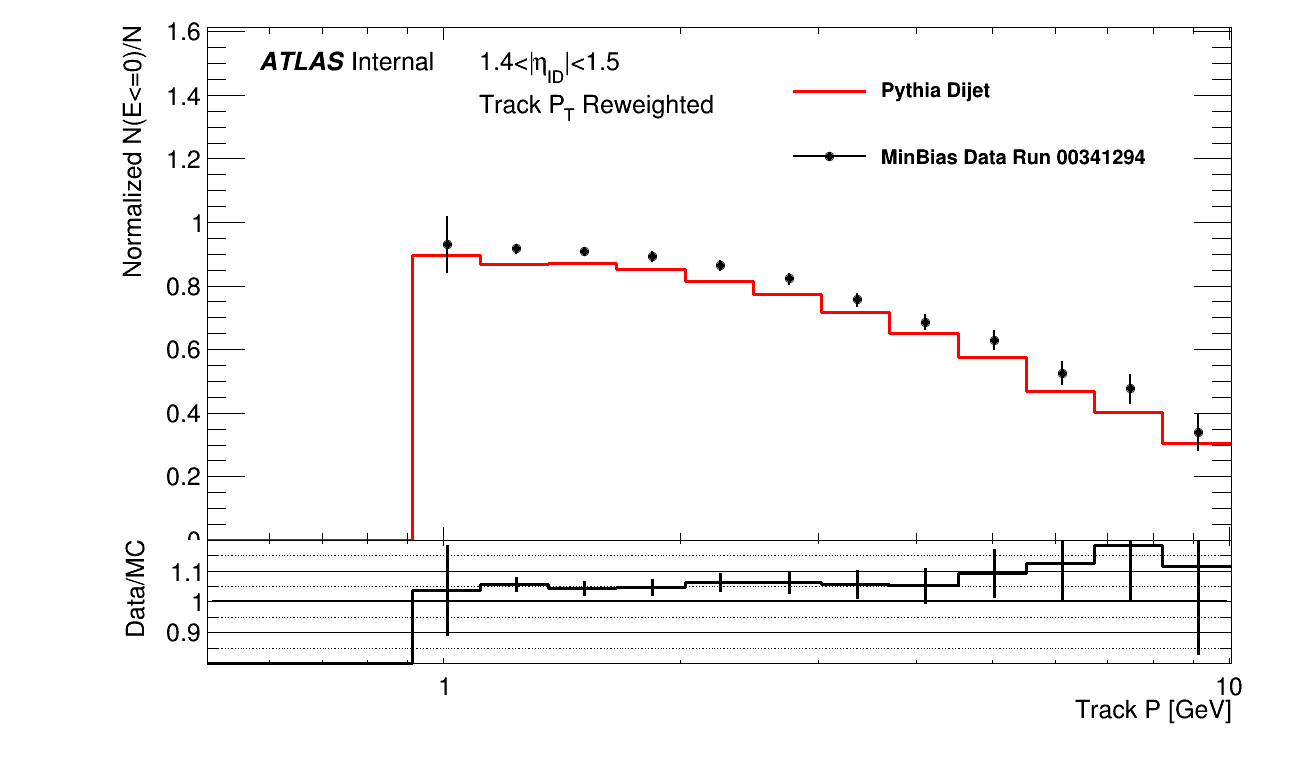

In [40]:
canvases[3].Draw()

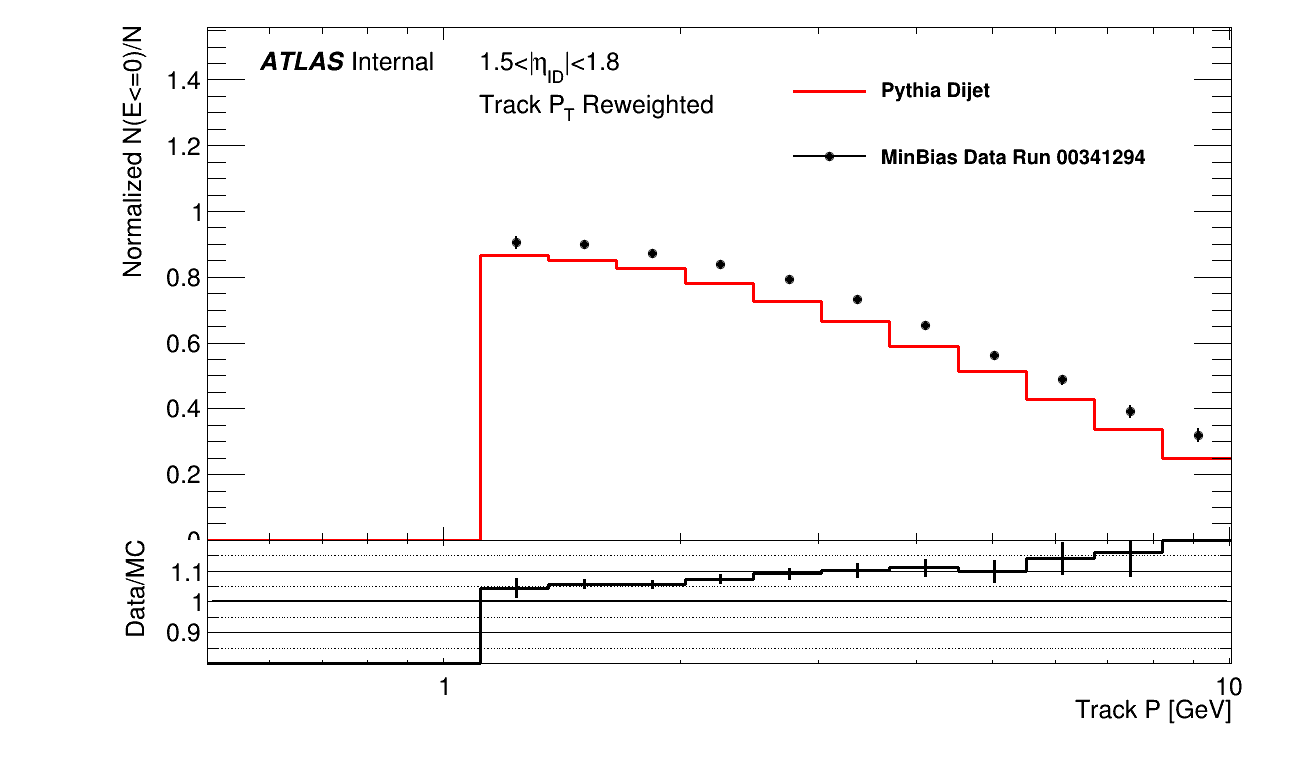

In [41]:
canvases[4].Draw()

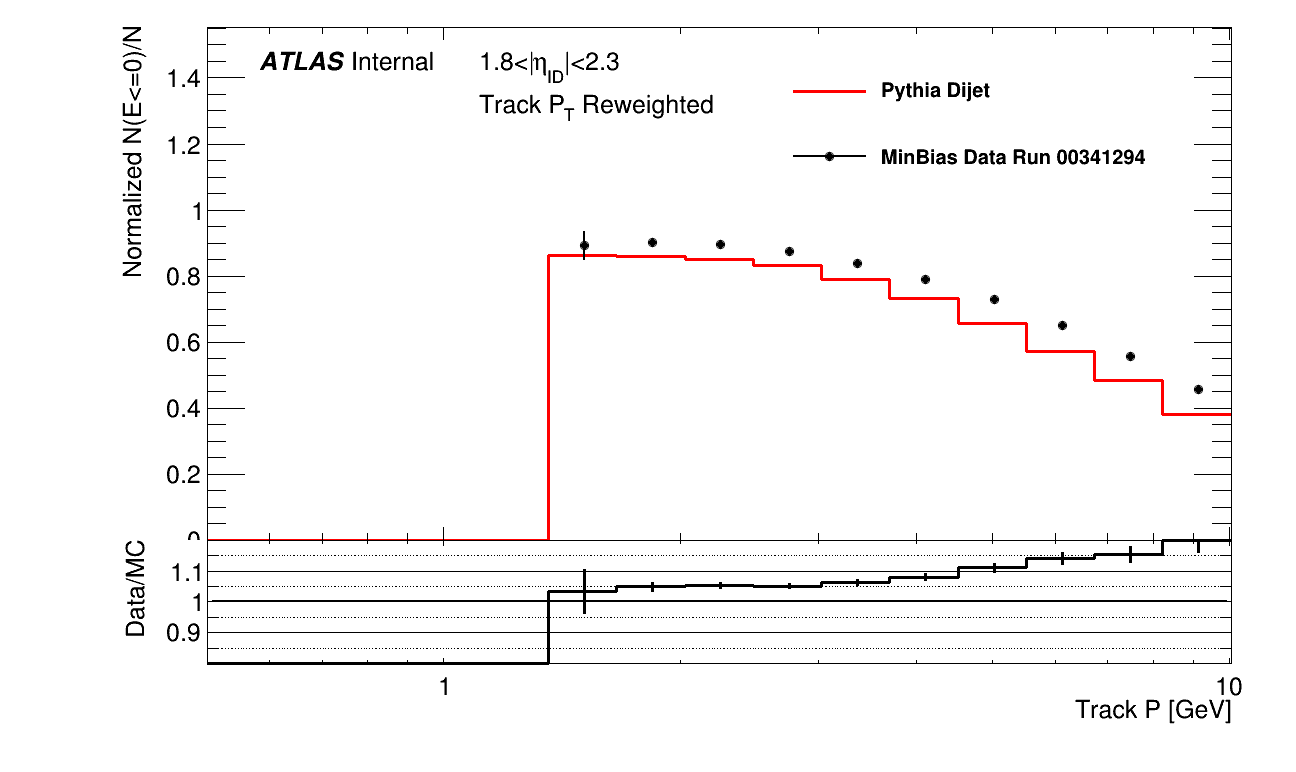

In [42]:
canvases[5].Draw()